In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Volunteer Opportunities Dataset

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
volunteer = pd.read_csv('./volunteer_opportunities.csv')
print(volunteer.shape)
volunteer.head(3)

(665, 35)


,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,amsl,amsl_unit,org_title,org_content_id,addresses_count,locality,region,postalcode,primary_loc,display_url,recurrence_type,hours,created_date,last_modified_date,start_date_date,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,NaN,NaN,Center For NYC Neighborhoods,4426,1,NaN,NY,NaN,NaN,/opportunities/4996,onetime,0,January 13 2011,June 23 2011,July 30 2011,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,NaN,NaN,Bpeace,37026,1,"5 22nd St\nNew York, NY 10010\n(40.74053152272...",NY,10010.0,NaN,/opportunities/5008,onetime,0,January 14 2011,January 25 2011,February 01 2011,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,NaN,NaN,Street Project,3001,1,NaN,NY,10026.0,NaN,/opportunities/5016,onetime,0,January 19 2011,January 21 2011,January 29 2011,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data - Rows

In [5]:
volunteer_ = volunteer.copy()

In [6]:
# check how many values are missing in the category_desc column
print(volunteer_['category_desc'].isna().sum())

# subset the volunteer dataset
volunteer_subset = volunteer_[volunteer_['category_desc'].notnull()]

# check the shape
print(volunteer_subset.shape)

48
(617, 35)


## Converting a column type

In [7]:
volunteer_ = volunteer.copy()

In [8]:
volunteer_.head(3)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,amsl,amsl_unit,org_title,org_content_id,addresses_count,locality,region,postalcode,primary_loc,display_url,recurrence_type,hours,created_date,last_modified_date,start_date_date,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,NaN,NaN,Center For NYC Neighborhoods,4426,1,NaN,NY,NaN,NaN,/opportunities/4996,onetime,0,January 13 2011,June 23 2011,July 30 2011,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,NaN,NaN,Bpeace,37026,1,"5 22nd St\nNew York, NY 10010\n(40.74053152272...",NY,10010.0,NaN,/opportunities/5008,onetime,0,January 14 2011,January 25 2011,February 01 2011,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,NaN,NaN,Street Project,3001,1,NaN,NY,10026.0,NaN,/opportunities/5016,onetime,0,January 19 2011,January 21 2011,January 29 2011,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(volunteer_['hits'].head())

# convert the hits column to float
volunteer_['hits'] = volunteer_['hits'].astype('float')

print(volunteer_['hits'].head())

0    737
1     22
2     62
3     14
4     31
Name: hits, dtype: int64
0    737.0
1     22.0
2     62.0
3     14.0
4     31.0
Name: hits, dtype: float64


## Stratified sampling

In [10]:
volunteer_ = volunteer.copy()
volunteer_.dropna(subset=['category_desc'], axis=0, inplace=True)

In [11]:
X = volunteer_.drop('category_desc', axis=1)
y = volunteer_['category_desc']

# Use stratified sampling to split up the dataset according to the y dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,)

# print out the category_desc counts on the training y labels
print(y_train.value_counts())

Strengthening Communities    230
Helping Neighbors in Need     89
Education                     69
Health                        39
Environment                   24
Emergency Preparedness        11
Name: category_desc, dtype: int64


## Encoding categorical variables - one-hot

In [12]:
volunteer_ = volunteer.copy()
volunteer_.dropna(subset=['category_desc'], axis=0, inplace=True)

In [13]:
# transform the column
category_enc = pd.get_dummies(volunteer_['category_desc'])

# take a look at the encoded columns
category_enc.head()

,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,1,0,0,0
5,0,0,1,0,0,0


## Engineering numerical features - datetime

In [14]:
volunteer_ = volunteer.copy()

In [15]:
# first, convert string column to date column
volunteer_['start_date_converted'] = pd.to_datetime(volunteer_['start_date_date'])

# extract just the month from the converted column
volunteer_['start_date_month'] = volunteer_['start_date_converted'].apply(lambda row: row.month)

# take a look at the columns
volunteer_[['start_date_converted', 'start_date_month']].head()

,start_date_converted,start_date_month
0,2011-07-30,7
1,2011-02-01,2
2,2011-01-29,1
3,2011-02-14,2
4,2011-02-05,2


## Engineering features from strings - tf/idf

In [16]:
volunteer_ = volunteer.copy()
volunteer_.dropna(subset=['category_desc'], axis=0, inplace=True)

In [17]:
# take the title text
title_text = volunteer_['title']

# create a vectorizer
tfidf_vec = TfidfVectorizer()

# transform the text into tf-df vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

## Text classification using tf/idf vectors

In [18]:
# split the datast according to the class distribution of category_desc
y = volunteer_['category_desc']
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y,
                                                    stratify=y,
                                                    random_state=42)

# fit a naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# score
nb.score(X_test, y_test)

0.5161290322580645

## Exploring text vectors

In [70]:
vocab = pd.read_csv('./vocab_volunteer.csv', index_col=0)
vocab = vocab.to_dict()['0']

In [71]:
# take a subset from volunteer, drop na rows
volunteer_ = volunteer[['category_desc', 'title']]
volunteer_.dropna(subset=['category_desc'], axis=0, inplace=True)
volunteer_.shape

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(617, 2)

In [76]:
# fit_transform a tfidf vectorizer on the title column
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(volunteer_['title'])

In [87]:
# add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices,
                      vector[vector_index].data))
    # transform zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    
    return [original_vocab[i] for i in zipped_index]

# print out the weighted words
print(return_weights(vocab=vocab,
                     original_vocab=tfidf_vec.vocabulary_,
                     vector=text_tfidf,
                     vector_index=8,
                     top_n=3))

[189, 942, 466]


In [88]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
    # Here we'll call return_weights and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    
    # return the list in a set so we don't get duplicate word indices
    return set(filter_list)

# call the function to get the list of word indices
filtered_words = words_to_filter(vocab=vocab,
                                 original_vocab=tfidf_vec.vocabulary_,
                                 vector=text_tfidf,
                                 top_n=3)

# by converting filtered_words back to a list, we can use it to filter
# the columns in the text vector
filtered_text = text_tfidf[:, list(filtered_words)]

In [92]:
filtered_text

<617x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 2948 stored elements in Compressed Sparse Row format>

## Training Naive Bayes with feature selection

In [98]:
X = filtered_text
y = volunteer_['category_desc']

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y,
                                                    stratify=y)

# fit a to naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

#score
print(nb.score(X_test, y_test))

0.5741935483870968


# Wine Types Dataset

In [19]:
wine = pd.read_csv('./wine_types.csv')
print(wine.shape)
wine.head(3)

(178, 14)


,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## Modeling without normalizing

In [21]:
X = wine.drop('Type', axis=1)
y = wine['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)

In [22]:
# fit a knn to training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# score on test set
print(knn.score(X_test, y_test))

0.6888888888888889


## Log normalization in Python

In [23]:
wine.var()

Type                                0.600679
Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

Looking at the variances of the features in the wine dataset, we see that `Proline` has a significantly huge variance. One solution to minimize this and consequently improve the model is by log normalization.

In [24]:
# print out the variance of the Proline column
print(wine['Proline'].var())

# apply log norm to the column
wine['Proline_log'] = np.log(wine['Proline'])

# check the variance
print(wine['Proline_log'].var())

99166.71735542436
0.17231366191842012


## Scaling data - standardizing columns

In [25]:
wine[['Ash', 'Alcalinity of ash', 'Magnesium']].describe()

,Ash,Alcalinity of ash,Magnesium
count,178.000000,178.000000,178.000000
mean,2.366517,19.494944,99.741573
std,0.274344,3.339564,14.282484
min,1.360000,10.600000,70.000000
25%,2.210000,17.200000,88.000000
50%,2.360000,19.500000,98.000000
75%,2.557500,21.500000,107.000000
max,3.230000,30.000000,162.000000


Looking at the `mean` and `max` of these three features, we see that they are measured on different scales, thus, the trained model may be biased. Here, we perform standardization.

In [26]:
# create scaler
ss = StandardScaler()

# take the subset
wine_subset = wine[['Ash', 'Alcalinity of ash', 'Magnesium']]

# apply the scaler
wine_subset_scaled = ss.fit_transform(wine_subset)

## kNN on non-scaled data

In [27]:
# fit a knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# test
print(knn.score(X_test, y_test))

0.6888888888888889


## kNN on scaled data

In [28]:
# scale data
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# fit a knn
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)

# test
print(knn.score(X_test_std, y_test))

0.9777777777777777


## Checking for correlated features

In [47]:
wine_ = wine[['Flavanoids', 'Total phenols', 'Malic acid', 'OD280/OD315 of diluted wines', 'Hue']]
wine_.head()

,Flavanoids,Total phenols,Malic acid,OD280/OD315 of diluted wines,Hue
0,3.06,2.80,1.71,3.92,1.04
1,2.76,2.65,1.78,3.40,1.05
2,3.24,2.80,2.36,3.17,1.03
3,3.49,3.85,1.95,3.45,0.86
4,2.69,2.80,2.59,2.93,1.04


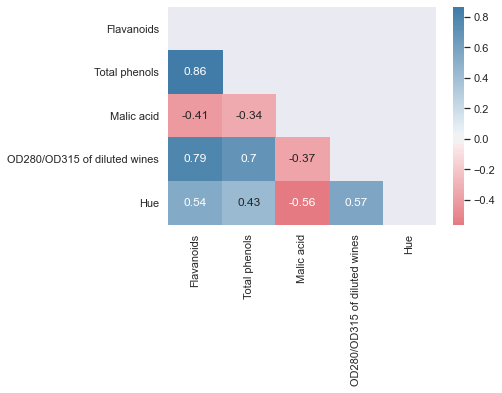

In [62]:
# check correlation
corr = wine_.corr()

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
            cmap=cmap,
            center=0,
            mask=mask,
            annot=True)

plt.show()

Looks like there is strong multicollinearity with `Flavanoids`

In [63]:
wine_ = wine_.drop('Flavanoids', axis=1)

## Using PCA

In [102]:
wine_ = wine.drop('Proline_log', axis=1)

In [103]:
# set up PCA and the X vector for dim reduc
pca = PCA()
wine_X = wine_.drop('Type', axis=1)

# apply pca to X
transformed_X = pca.fit_transform(wine_X)

# look at the explained variance
print(pca.explained_variance_ratio_)

[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


## Training a model with PCA

In [104]:
y = wine_['Type']

knn = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y,
                                                    random_state=42)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7111111111111111


# Hiking Dataset

In [30]:
hiking = pd.read_json('./hiking.json')
print(hiking.shape)
hiking.head()

(33, 11)


,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


## Encoding categorical variables - binary

In [31]:
# set up LabelEncoder
enc = LabelEncoder()

# apply to 'Accessible' column
hiking['Accessible_enc'] = enc.fit_transform(hiking['Accessible'])

# compare the two
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0


## Engineering features from strings - extraction

In [32]:
# write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r'\d+\.\d+')
    
    if length == None:
        return
    
    # search the text for matches
    mile = re.match(pattern, length)
    
    #if a value is returned, use group(0) the return the found value
    if mile is not None:
        return float(mile.group(0))

In [33]:
# apply the function to the Length column and take a look at both columns
hiking['Length_num'] = hiking['Length'].apply(lambda row: return_mileage(row))

hiking[['Length', 'Length_num']].head()

,Length,Length_num
0,0.8 miles,0.80
1,1.0 mile,1.00
2,0.75 miles,0.75
3,0.5 miles,0.50
4,0.5 miles,0.50


# Running Times 5k

In [34]:
run5k = pd.read_csv('./running_times_5k.csv')
run5k.head()

,name,run1,run2,run3,run4,run5
0,Sue,20.1,18.5,19.6,20.3,18.3
1,Mark,16.5,17.1,16.9,17.6,17.3
2,Sean,23.5,25.1,25.2,24.6,23.9
3,Erin,21.7,21.1,20.9,22.1,22.2
4,Jenny,25.8,27.1,26.1,26.7,26.9


## Engineering numerical features - taking an average

In [35]:
# create a list of cols to avg
run_cols = ['run1', 'run2', 'run3', 'run4', 'run5']

# use apply to create a mean col
run5k['mean'] = run5k.apply(lambda row: row[run_cols].mean(), axis=1)
run5k

,name,run1,run2,run3,run4,run5,mean
0,Sue,20.1,18.5,19.6,20.3,18.3,19.36
1,Mark,16.5,17.1,16.9,17.6,17.3,17.08
2,Sean,23.5,25.1,25.2,24.6,23.9,24.46
3,Erin,21.7,21.1,20.9,22.1,22.2,21.60
4,Jenny,25.8,27.1,26.1,26.7,26.9,26.52
5,Russell,30.9,29.6,31.4,30.4,29.9,30.44


# Volunteer Variant Data

In [42]:
volunteer_sample = pd.read_csv('./volunteer_sample.csv')
print(volunteer_sample.shape)
volunteer_sample.head(3)

(617, 16)


,vol_requests,title,hits,category_desc,locality,region,postalcode,created_date,vol_requests_lognorm,created_month,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
0,2,Web designer,22,Strengthening Communities,"5 22nd St\nNew York, NY 10010\n(40.74053152272...",NY,10010.0,2011-01-14,0.693147,1,0,0,0,0,0,1
1,20,Urban Adventures - Ice Skating at Lasker Rink,62,Strengthening Communities,NaN,NY,10026.0,2011-01-19,2.995732,1,0,0,0,0,0,1
2,500,Fight global hunger and support women farmers ...,14,Strengthening Communities,NaN,NY,2114.0,2011-01-21,6.214608,1,0,0,0,0,0,1


## Selecting Relevant features

In [43]:
# create a list of redundant features
# keep only postalcode for location-related features
# category_desc, created_data, and vol_requests have already been processed
to_drop = ['locality', 'region', 'category_desc',
           'created_date', 'vol_requests']

# drop the columns from the dataset
volunteer_subset = volunteer_sample.drop(to_drop, axis=1)
volunteer_subset.head(3)

,title,hits,postalcode,vol_requests_lognorm,created_month,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
0,Web designer,22,10010.0,0.693147,1,0,0,0,0,0,1
1,Urban Adventures - Ice Skating at Lasker Rink,62,10026.0,2.995732,1,0,0,0,0,0,1
2,Fight global hunger and support women farmers ...,14,2114.0,6.214608,1,0,0,0,0,0,1
